# ***Month 02 (Mini-project) Models***

Here is mini project 2. This time, pick a tough dataset related to a regression problem, clean it, perform EDA, apply transformations, conduct statistical tests (hypothesis, etc.), and prepare the data for ML models.
Models:
Baseline regressors (SVM, linear regression, Random Forest Regression, decision tree, gradient boosting, etc.)
An ANN, and display the error curve to identify if there is any overfitting or underfitting.
A model with some convolutional layers at the start (1D convolutional layer) followed by ANN layers; display the error curve and identify if there is any overfitting or underfitting.
Please note: try to provide as much information as possible from each plot or finding from any test performed.
***
***

# ***Data Cleaning and Preprocessing***
***
***

## ***Importing Libraries***

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout
from tensorflow.keras.layers import BatchNormalization



In [210]:
df=pd.read_csv("/content/laptopData.csv")

In [211]:
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [212]:
df.drop("Unnamed: 0",axis=1,inplace=True)

***
## ***Checking for Null values***

In [213]:

print("Null values in each column:")
print(df.isnull().sum())


Null values in each column:
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


***
## ***Handling missing values***


In [215]:
# For numerical columns, fillling with median
# For categorical columns, fillling with mode

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [216]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


***
## ***Checking for Duplicated rows***

In [217]:
duplicated_rows = df[df.duplicated()]

print("Number of duplicated rows:", duplicated_rows.shape[0])


Number of duplicated rows: 58


In [218]:
df = df.drop_duplicates()

In [219]:
duplicated_rows = df[df.duplicated()]

print("Number of duplicated rows:", duplicated_rows.shape[0])


Number of duplicated rows: 0


***
## ***Splitting data into numerical and categorical columns***

In [214]:
# Identifying numerical columns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_columns)

# Identifying categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['Price']
Categorical Columns: ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


In [221]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1245 non-null   object 
 1   TypeName          1245 non-null   object 
 2   Inches            1245 non-null   object 
 3   ScreenResolution  1245 non-null   object 
 4   Cpu               1245 non-null   object 
 5   Ram               1245 non-null   object 
 6   Memory            1245 non-null   object 
 7   Gpu               1245 non-null   object 
 8   OpSys             1245 non-null   object 
 9   Weight            1245 non-null   object 
 10  Price             1245 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.7+ KB


***
***
# Data Transformation

***
***

## ***Apply standard scaling to numerical columns***

In [223]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


## ***Applying one-hot encoding to categorical columns***

In [224]:
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)


In [225]:
df_categorical=df_categorical.astype(int)

In [226]:
# Concatenate numerical and categorical data
df= pd.concat([df[numerical_cols], df_categorical], axis=1)


In [227]:
df.head()


,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,Weight_4.6kg,Weight_4.7kg,Weight_4kg,Weight_5.4kg,Weight_5.8kg,Weight_6.2kg,Weight_7.2kg,Weight_8.23kg,Weight_8.4kg,Weight_?
0,0.288251,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.339719,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.801262,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.994792,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.949219,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***
***
# Exploratory Data Analysis (EDA)

***
***

In [228]:
# Summary statistics
print(df_transformed.describe())


             Weight         Price
count  1.245000e+03  1.245000e+03
mean  -5.707171e-18 -5.707171e-18
std    1.000402e+00  1.000402e+00
min   -2.558244e+00 -1.372597e+00
25%   -7.136889e-01 -7.471201e-01
50%   -4.956040e-02 -2.114040e-01
75%    3.071012e-01  5.138074e-01
max    1.109304e+01  7.069206e+00


## ***Distribution of the Target Variable (Price)***



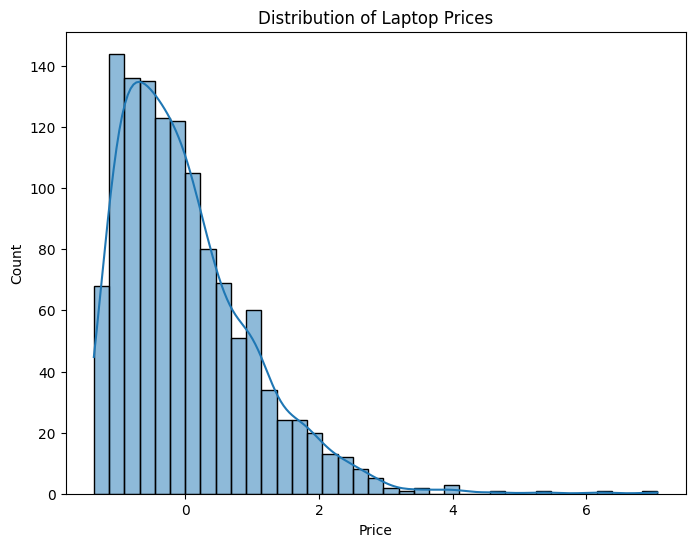

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Laptop Prices')
plt.show()


***
***
# ***Machine Learning Model Preparation***
***
***


### ***Train-Test Split***



In [231]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_transformed.drop('Price', axis=1)
y = df_transformed['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***
# ***Baseline Regressors***

# ***Linear Regression***



In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}')


Linear Regression - MSE: 2.4546698358638715e+19, R^2: -2.2014934053016154e+19


# ***SVM***

In [233]:
from sklearn.svm import SVR

# Support Vector Regression model
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regression - MSE: {mse_svr}, R^2: {r2_svr}')


Support Vector Regression - MSE: 0.26949503519606754, R^2: 0.7583008785632173


#  ***Random Forest Regression***



In [234]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression - MSE: {mse_rf}, R^2: {r2_rf}')


Random Forest Regression - MSE: 0.22323301567921067, R^2: 0.7997913997707069


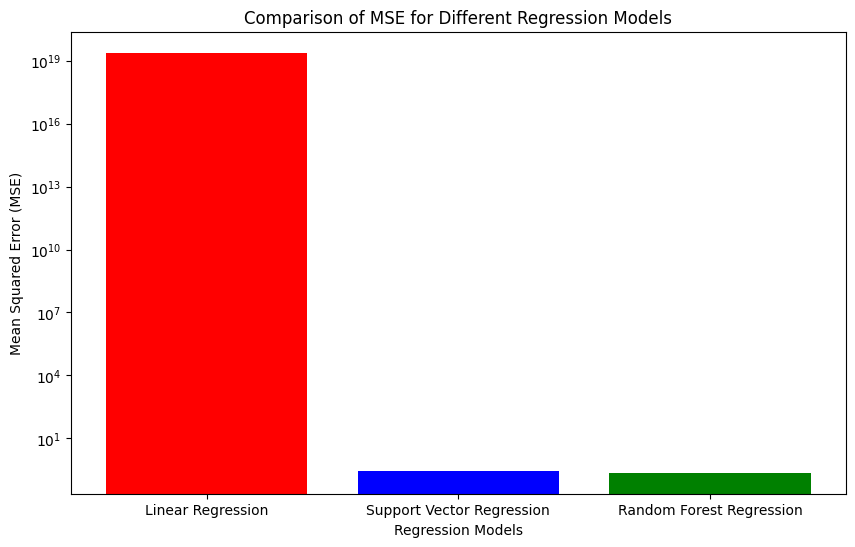

In [267]:

models = ['Linear Regression', 'Support Vector Regression', 'Random Forest Regression']
mse_values = [2.4547e+19, 0.2695, 0.2232]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['red', 'blue', 'green'])
plt.yscale('log')  # Using log scale for better visibility
plt.title('Comparison of MSE for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


## ***Insights***
- Linear Regression is not suitable for dataset as it fails to capture the underlying patterns, which is likely due to its linear nature and possibly inadequate feature selection or data quality issues.

- Support Vector Regression performs better than linear regression but is still less effective compared to Random Forest Regression. SVR can handle non-linear relationships but may not be as powerful as ensemble methods like Random Forest.

- Random Forest Regression has the best performance among the three models. It has the lowest MSE and the highest R² value, indicating that it is able to explain about 80% of the variance in the target variable.This suggests that Random Forest is capturing the underlying patterns and interactions within the data most effectively.

## ***RESULT***
Best performance among the three IS Random Forest Regressor with the lowest MSE and highest R².

***
***
# ***Building Artificial Neural Network (ANN)***
***
***

In [235]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ann.compile(optimizer='adam', loss='mean_squared_error')
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9219 - val_loss: 0.7049
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4038 - val_loss: 0.3951
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2252 - val_loss: 0.3203
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2001 - val_loss: 0.2521
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1118 - val_loss: 0.2296
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0887 - val_loss: 0.2000
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1071 - val_loss: 0.1855
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0596 - val_loss: 0.1794
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0543 - val_loss: 0.1676
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0499 - val_loss: 0.1702
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0399 - val_loss: 0.1651
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0

## ***Plotting error curve for ANN Model***


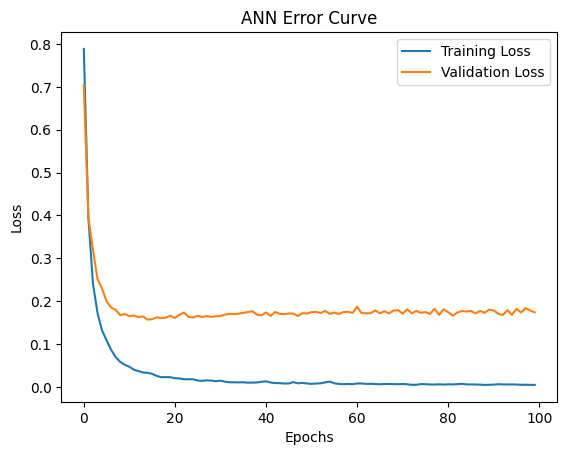

In [236]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Error Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ***INSIGHTS***

- ***Training Loss:*** The blue line representing the training loss decreases sharply at the beginning and then becomes stable, indicating that the model is learning well from the training data.
- ***Validation Loss:*** The orange line representing the validation loss also decreases initially and then stabilizes with minor fluctuations.

## ***RESULTS***
- Overfitting: The model does not appear to be overfitting. In overfitting, the validation loss would typically start increasing after a certain number of epochs, while the training loss continues to decrease. Here, both losses stabilize, suggesting the model generalizes well to new data.
- Underfitting: The model is not underfitting either. Underfitting would be indicated by both training and validation losses remaining high, which is not the case here.

Overall, the model seems to be performing well, with no clear signs of overfitting or underfitting.

***
***
# ***Convolutional Neural Network (CNN) with ANN Layers***
***
***


In [263]:
# Converting train and test data to numpy array and reshaping
X_train_np = X_train.to_numpy().astype('float32')
X_test_np = X_test.to_numpy().astype('float32')

X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)


In [264]:
# Defining the CNN with ANN layers
cnn_ann = Sequential()
cnn_ann.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_ann.add(Flatten())
cnn_ann.add(Dense(32, activation='relu'))
cnn_ann.add(Dense(1))

# Compiling the model
cnn_ann.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
history_cnn_ann = cnn_ann.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.5679 - val_loss: 0.3024
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1923 - val_loss: 0.2281
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1149 - val_loss: 0.1998
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0828 - val_loss: 0.1891
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0821 - val_loss: 0.1761
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0763 - val_loss: 0.2060
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0732 - val_loss: 0.1751
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0564 - val_loss: 0.1835
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0511 - val_loss: 0.1902
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0517 - val_loss: 0.1811
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0474 - val_loss: 0.1837
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

# ***Plotting CNN Error Curve***

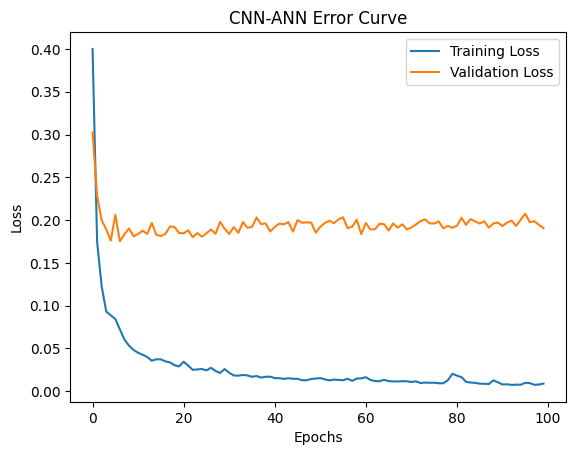

In [265]:

plt.plot(history_cnn_ann.history['loss'], label='Training Loss')
plt.plot(history_cnn_ann.history['val_loss'], label='Validation Loss')
plt.title('CNN-ANN Error Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ***INSIGHTS***
- ***Training Loss:***  The blue line representing the training loss decreases sharply and then levels off, indicating that the model is learning well from the training data.
- ***Validation Loss:*** The orange line representing the validation loss decreases initially but then fluctuates and remains higher than the training loss.

## ***RESULTS***
- Overfitting: The model appears to be overfitting. This is indicated by the training loss continuing to decrease and becoming very low, while the validation loss stops decreasing and remains higher. This suggests that the model performs well on the training data but does not generalize well to new, unseen data.
- Underfitting: The model is not underfitting. Underfitting would be indicated by both training and validation losses remaining high, which is not the case here.

Overall, the significant gap between the training and validation losses suggests that the model is overfitting

***

## ***Applying Overfitting Reduction Techniques (Batch-Normalization and dropout layer)***

In [282]:

# Reshape the input data to add a third dimension
X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)

# Define the model
cnn_ann = Sequential()

# Correct input shape for Conv1D
cnn_ann.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_ann.add(BatchNormalization())  # Add batch normalization after the convolutional layer
cnn_ann.add(Dropout(0.5))
cnn_ann.add(Flatten())
cnn_ann.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
cnn_ann.add(BatchNormalization())  # Add batch normalization after the dense layer
cnn_ann.add(Dense(1))

# Compile the model
cnn_ann.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history_cnn_ann = cnn_ann.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=100)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2.5738 - val_loss: 1.5968
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.9985 - val_loss: 1.6112
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.7692 - val_loss: 1.5877
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.6463 - val_loss: 1.5740
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.5417 - val_loss: 1.5012
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.5036 - val_loss: 1.4341
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.4562 - val_loss: 1.4228
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.4239 - val_loss: 1.2652
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.3963 - val_loss: 1.1959
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.3732 - val_loss: 1.1014
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.3507 - val_loss: 1.0476
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step

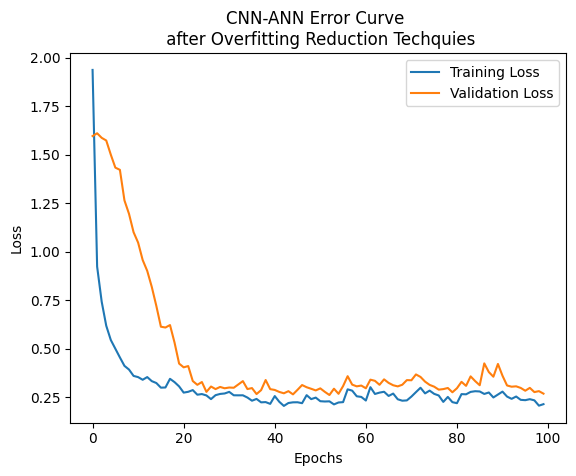

In [284]:

plt.plot(history_cnn_ann.history['loss'], label='Training Loss')
plt.plot(history_cnn_ann.history['val_loss'], label='Validation Loss')
plt.title('CNN-ANN Error Curve \n after Overfitting Reduction Techquies')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ***INSIGHTS***
- Training Loss (Blue Line):
The training loss decreases sharply initially and then flattens out as the epochs increase.
This indicates that the model is learning well from the training data.
- Validation Loss (Orange Line):
The validation loss also decreases but with some fluctuations.
It remains above the training loss throughout the epochs.
## ***RESULTS***
- Overfitting Reduction:
By applying batch normalization and dropout have helped in reducing overfitting to some extent.Since validation loss is not diverging significantly from the training loss.